In [10]:
import csv
import os
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot

def buildNeuralNetwork():    
    
    # reading the data from different candidate cells
    # and from the target cell data
    
    target_celldata = [3.15, 4.4, 12.19, 10.46, 17.17, 23.11,  6.31, 3.86,
                       3.41, 1.8,  8.8,  7.55,  14.66, 29.97,  4.14, 3.57, 
                       2.25, 1.5,  7.02, 5.76,  11.54, 25.44,  3.95, 2.36,
                       2.13, 1.25, 6.53, 3.67,  10.93, 23.03,  4.3,  2.46]
    
    candidate_cell1 = [2.9, 4.68, 16.23,  8.58,  10.75, 20.12, 4.54, 2.01,
                      2.32, 2.43,  7.04,  5.63,  11.4,  21.95, 3.7,  2,
                      3.4,  3.42,  9.65,  5.41,  14.1,  26.13, 5.31, 3.22,
                      5.77, 2.78,  8.41,  4.58,  9.47,  22.82, 7.1,  2.71]
    
    candidate_cell2 = [8.23, 4.54, 19.48, 9.26, 16.64, 27.61, 10.95, 1.84,
                      3.16,  5.35, 10.18, 8.42, 16.74, 25.25, 6.42, 2.62,
                      4.38,  4.46, 11.07, 7.37, 16.46, 24.17, 5.28, 2.16,
                      2.28,  1.87, 11.49, 5.71,  10.66, 22.43, 4.81,  0.74]
    
    candidate_cell3 = [2.01, 4.47, 16.08, 11.09, 12.36,  22.94, 5.1,  2.81,
                      3.04,  7.02, 10.19, 7.92,  10.16,  23,    4.3,  3.36,
                      4.17,  2.16, 11.15, 7.09,  12.05,  23.71, 5.68, 2.3,
                      4.1,   3.24, 16.77, 9.82,  16.56,  21.89, 7.66, 3.96]

      
    target_data = np.array(target_celldata)
    
    # The ‘.T’ function, transposes the matrix from horizontal to vertical. 
    # So the input_data is storing the numbers like this
    
    input_data = np.array([candidate_cell1,candidate_cell2,candidate_cell3]).T
    
    # variable initialization
    epocIterations = 500
    #Setting learning rate    
    learningRate=0.2
    
    #Building a Neural Network
    #hiddenlayers_neurons = 2
    
    #forward Propogation:    
    #weights1 = np.random.randn()
    #weights2 = np.random.randn()
    #weights3 = np.random.randn()    
    #bias  = np.random.randn()
    
    weights1 = 0.1
    weights2 = 0.2
    weights3 = 0.3    
    bias  = 0.1

    # plotting the scatter data
    pyplot.axis([0,62,0,62])
    pyplot.grid()   
       
    for i in range(0, len(target_data)):
        point = input_data[i]
        print("input_data[i]=", input_data[i])
      
        # weighted averge of points features and bias
        points1 = point[0]
        points2 = point[1]
        points3 = point[2]
        
        target = target_data[i]
        print("target_data[i]", target_data[i])
        
        #targetPoint = float(target[0])
        pyplot.scatter(points1, points2, target, c="b")    
    
        # Run the EPOC -> Forward propagation and Back propogation in iterations
        # training the data ; training algorithm for a neural network (to minimize the error)
        # predication close to target
        
        for i in range(1, epocIterations):
            
            #Sum of the weights + bias
            # This could be one of the Hidden layer (hidden_1) output
            z = (points1 * weights1) + (points2 * weights2) + (points3 * weights3) + bias

            # Activation function on z ( non-linear transformation)
            # This is the predicted output, after applying activation function
            prediction = sigmoid(z)

            # similar way calculate another Hidden layer values (hidden_2) output
            # hidden_2 = (points1 * weights5) + (points2 * weights6) + (points3 * weights7) + bias

            #similary calculate the output value (output_1) from the hidden layers
            # output_z = (hidden_1 * weight9) + (hidden_2 * weight10) + bias2
            #
            # Then apply activation function on the output_z
            # This is the final output with hidden layers
            # prediction = sigmoid(output_z)
            #
        
            # Back propogation 
            # Finding the cost function ( Square of Error)        
            costs = np.square(target  - prediction)        
            #pyplot.plot(costs)
            
            # slope function is 2 times * difference of prediction - target
            # To minimize the costs
            derivative_costs = 2 * (target - prediction)
            
            # Slope or Gradient of the prediction (derivative of prediction)
            derivative_z = sigmoid_dervt(z)
            
            # Performoing weights Adjustment
            derivative_weights1 = derivative_costs * derivative_z * points1
            derivative_weights2 = derivative_costs * derivative_z * points2
            derivative_weights3 = derivative_costs * derivative_z * points3
            # bias = 1.0
            derivative_bias = derivative_costs * derivative_z * 0.4

            # adjust the weights now
            weights1 = weights1 - (learningRate * derivative_weights1)
            weights2 = weights2 - (learningRate * derivative_weights2)
            weights3 = weights3 - (learningRate * derivative_weights3)
            bias = bias - (learningRate * derivative_bias)
            
            # that's it !!!
        
        print("costs=",  costs)
        #pyplot.plot(costs)
            
    return
        
#Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# derivate of Sigmoid Function
def sigmoid_dervt(x):
    return sigmoid(x) * (1-sigmoid(x)) 

def add_data_list(number):
    input_data.append(number)
    return

input_data[i]= [2.9  8.23 2.01]
target_data[i] 3.15
costs= 9.922491868077858
input_data[i]= [4.68 4.54 4.47]
target_data[i] 4.4
costs= 19.359462565475898
input_data[i]= [16.23 19.48 16.08]
target_data[i] 12.19
costs= 148.59609999999998
input_data[i]= [ 8.58  9.26 11.09]
target_data[i] 10.46
costs= 109.41159993499696
input_data[i]= [10.75 16.64 12.36]
target_data[i] 17.17
costs= 294.8088999999996
input_data[i]= [20.12 27.61 22.94]
target_data[i] 23.11
costs= 534.0721
input_data[i]= [ 4.54 10.95  5.1 ]
target_data[i] 6.31
costs= 39.81609994385905
input_data[i]= [2.01 1.84 2.81]
target_data[i] 3.86
costs= 14.89346663608468
input_data[i]= [2.32 3.16 3.04]
target_data[i] 3.41
costs= 11.627816869244343
input_data[i]= [2.43 5.35 7.02]
target_data[i] 1.8
costs= 3.239999845491732
input_data[i]= [ 7.04 10.18 10.19]
target_data[i] 8.8
costs= 77.43999999999983
input_data[i]= [5.63 8.42 7.92]
target_data[i] 7.55
costs= 57.00249999993432
input_data[i]= [11.4  16.74 10.16]
target_data[i] 14.66
costs=

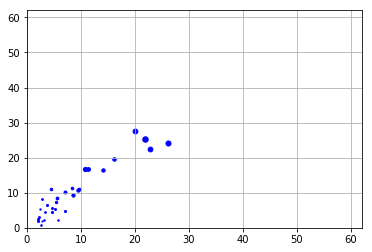

In [9]:
buildNeuralNetwork()